In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

In [3]:
def fx(x):
    return np.cos(2*np.pi*x) + 2**x

def deriv(x):
    return -2*np.pi*np.sin(2*np.pi*x) + 2**x

# define a range of x values
x = np.linspace(-2, 2, 2001)

Starting point: [1.146]
Local minimum occurs at x = [1.42948839]


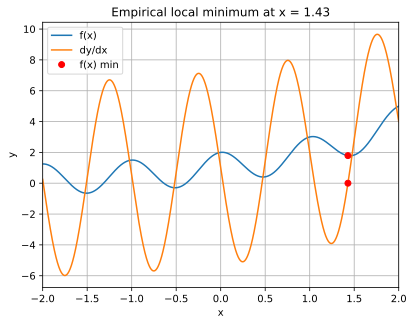

Gradient descent results:

Shape: (100, 2)
[[ 1.17375794e+00 -2.77579410e+00]
 [ 1.20695736e+00 -3.31994191e+00]
 [ 1.24442038e+00 -3.74630234e+00]
 [ 1.28352129e+00 -3.91009105e+00]
 [ 1.32062141e+00 -3.71001140e+00]
 [ 1.35239112e+00 -3.17697072e+00]
 [ 1.37712909e+00 -2.47379703e+00]
 [ 1.39498452e+00 -1.78554317e+00]
 [ 1.40720086e+00 -1.22163425e+00]
 [ 1.41527342e+00 -8.07255790e-01]
 [ 1.42049345e+00 -5.22003125e-01]
 [ 1.42382437e+00 -3.33091626e-01]
 [ 1.42593261e+00 -2.10824012e-01]
 [ 1.42726032e+00 -1.32771438e-01]
 [ 1.42809390e+00 -8.33582964e-02]
 [ 1.42861625e+00 -5.22351174e-02]
 [ 1.42894319e+00 -3.26934241e-02]
 [ 1.42914766e+00 -2.04473537e-02]
 [ 1.42927549e+00 -1.27824371e-02]
 [ 1.42935537e+00 -7.98850243e-03]
 [ 1.42940529e+00 -4.99159296e-03]
 [ 1.42943647e+00 -3.11863330e-03]
 [ 1.42945596e+00 -1.94831460e-03]
 [ 1.42946813e+00 -1.21712418e-03]
 [ 1.42947573e+00 -7.60324255e-04]
 [ 1.42948048e+00 -4.74958211e-04]
 [ 1.42948345e+00 -2.96693023e-04]
 [ 1.4294853

In [24]:
# pick a random starting point
localmin = np.random.choice(x, 1)
print('Starting point:', localmin)

# learning parameters
learning_rate = 0.01
training_epochs = 100

# gradient descent, store all the results
modelparams = np.zeros((training_epochs, 2))
for epoch in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate * grad
    modelparams[epoch] = localmin[0], grad[0]

print('Local minimum occurs at x =', localmin)

# plot the result
plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['f(x)', 'dy/dx', 'f(x) min'])
plt.title('Empirical local minimum at x = {:.2f}'.format(localmin[0]))
plt.show()

print('Gradient descent results:\n')
print("Shape:", modelparams.shape)
print(modelparams)

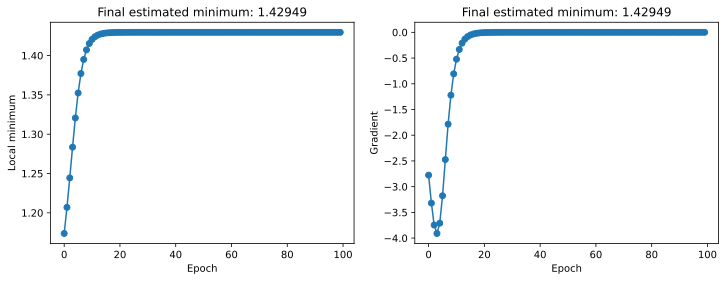

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    ax[i].plot(modelparams[:, i], 'o-')
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('Value')
    ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Gradient')
plt.show()